In [224]:
import tweepy

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler 
from tweepy import Stream
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


import pandas as pd

In [225]:
# Secret Credentials 
ACCESS_TOKEN = "500435442-ZsyX0WGAgAsiK3mPMwCLVZgXaM4mPeLpOZHh46Uc"
ACCESS_TOKEN_SECRET = "tI6pbzVsXWzNmfUEC07by6ZpJc5d58vu0sKxovxuDQEoY"
CONSUMER_KEY = "zazEfoGYmcJp8IZCQZYeleORe"
CONSUMER_SECRET = "JtTfz6C4WaCNZkzmn02U4GkOoilCyiIVKFFknuLgWD51MeVySm"

In [226]:
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api=tweepy.API(auth)

In [227]:
tweets=[]
retweet=[]
likes=[]

In [228]:
#input from website 
user_input='CA'
userx=['SkyNews','ABC','9NewsMelb','dailytelegraph']

In [229]:
# a=tweepy.Cursor(api.user_timeline,id=userx).items(200)
# a=list(a)
data=[]
for i in range(len(userx)):
    searched_tweets = [status for status in tweepy.Cursor(api.user_timeline,id=userx[i]).items(200)]
    tweets=[]
    for i in searched_tweets:
        tweets.append(i.text)
    data.append(tweets)
    

In [230]:
# Twitter_df2=pd.DataFrame({'tweets':tweets,'likes':likes,'retweet':retweet})
# Twitter_df2

In [231]:



#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("softmax.pkl","rb"))




In [232]:
news_category=[]

In [233]:
for i in range(len(data)):
    for j in range(len(data[i])):
        X_new_counts = loaded_vec.transform([data[i][j]])
        X_new_tfidf = loaded_tfidf.transform(X_new_counts)
        predicted = loaded_model.predict(X_new_tfidf)
        news_category.append(predicted)





In [234]:
from itertools import islice

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())



In [248]:
x=[]
for i in range(len(news_category)):
    x.append(news_category[i][0])
    
cumulative_count=[]
set_x=list(set(x))

for j in range(len(set_x)):
    cumulative_count.append(x.count(set_x[j]))


# c1=x[0:200]
# c2=x[200:400]
# c3=x[400:600]

In [236]:
import numpy as np 
N_c=list(chunk(x, 200))


In [237]:
# set_x=list(set(x))
# set_x_count1=[]
# set_x_count2=[]
# set_x_count3=[]

In [238]:
count_y=[]

for i in range(len(N_c)):
    count=[]
    for j in range(len(set_x)):
        count.append(N_c[i].count(set_x[j]))
    count_y.append(count)

In [239]:
# list1=[]
# for i in range(len(count_y)):
#     list1.append([userx[i],count_y[i]])
# df=pd.DataFrame(list1,columns=['Name','Values'])

In [240]:
# Tweet_Uni=dict(zip(set_x,set_x_count))
# count1=list(Tweet_Uni.values())
# size1=[]
# for i in count1:
#     size1.append(i)

# colours=[]
# c=120
# for i in range(len(count1)):
#     c=c+2
#     colours.append(c)



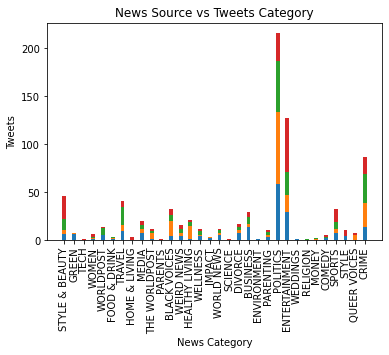

In [241]:
w=0.4

for i in range(len(count_y)):
    plt.bar(set_x, count_y[i],w,bottom = np.sum(count_y[:i], axis = 0))
    plt.xlabel('News Category')
    plt.ylabel('Tweets')
    plt.title('News Source vs Tweets Category')
    plt.xticks(rotation=90)
plt.show()

In [242]:
# import matplotlib.pyplot as plt


# plt.bar(set_x,count_y[0],w)
# plt.bar(set_x,count_y[1],w,bottom=count_y[0])
# plt.bar(set_x,count_y[2],w,bottom=count_y[0])

# plt.xlabel('News Category')
# plt.ylabel('Tweets')
# plt.title('News Source vs Tweets Category')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


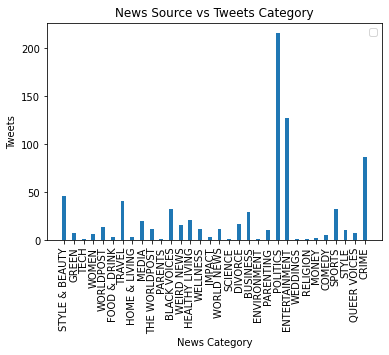

In [249]:
plt.bar(set_x,cumulative_count,w)
plt.xlabel('News Category')
plt.ylabel('Tweets')
plt.title('News Source vs Tweets Category')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [250]:
# !pip install plotly
import plotly.graph_objects as go

fig1 = go.Figure(data=[go.Scatter(
    x=set_x,
    y=cumulative_count,
    mode='markers',
    marker=dict(
        color=colours,
        size=size1,
        showscale=True
        )
)])
fig1.show()

bar1=[set_x,set_x_count]

In [ ]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig2 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=set_x_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig2.show()

# bar2=[set_x,set_x_count]

In [ ]:
# # !pip install seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as figure
# df1=pd.DataFrame({'x':bar1[0],'y':bar1[1]})
# df2=pd.DataFrame({'x':bar2[0],'y':bar2[1]})

# df1['hue']='Skynews'
# df2['hue']='ABC'

# combined=pd.concat([df1,df2])

# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
# g=sns.barplot(ax=ax,x='x',y='y',data=combined,hue='hue')
# plt.setp(g.get_xticklabels(), rotation=90)
# plt.show()


In [ ]:
# figx.show()

In [ ]:
# !pip install -U kaleido
# !conda install psutil

In [ ]:
# fig.write_image("yourfile.png") 

In [262]:
import json
data = {}
if user_input=='CA':
    data=dict(zip(set_x,cumulative_count))
    json_data = json.dumps(data)
else:
    json_data = json.dumps(count_y)



'{"STYLE & BEAUTY": 46, "GREEN": 7, "TECH": 1, "WOMEN": 6, "WORLDPOST": 14, "FOOD & DRINK": 3, "TRAVEL": 41, "HOME & LIVING": 3, "MEDIA": 20, "THE WORLDPOST": 12, "PARENTS": 1, "BLACK VOICES": 33, "WEIRD NEWS": 16, "HEALTHY LIVING": 21, "WELLNESS": 12, "IMPACT": 3, "WORLD NEWS": 12, "SCIENCE": 1, "DIVORCE": 17, "BUSINESS": 29, "ENVIRONMENT": 1, "PARENTING": 11, "POLITICS": 216, "ENTERTAINMENT": 127, "WEDDINGS": 1, "RELIGION": 1, "MONEY": 2, "COMEDY": 5, "SPORTS": 33, "STYLE": 11, "QUEER VOICES": 7, "CRIME": 87}'

In [ ]:
# json_data

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(set_x, set_x_count, s=size1,c=colours)


In [ ]:
# plt.to_json('json_file.json')

In [ ]:
# plt.scatter(
#     x = set_x, 
#     y = set_x_count, 
#     s=size1, 
#     c=colours, 
#     cmap="Accent", 
#     alpha=0.6, 
#     edgecolors="white", 
#     linewidth=2);
 
# plt.xlabel("News Category")
# plt.ylabel("Frequency")
# plt.title("TWITTER ANALYSIS")
# plt.ylim(0,200)



In [ ]:
# plt.savefig(fname='fig2.png')
